In [1]:
import os
os.getcwd()

'C:\\Users\\hp\\Learnbay_Python_Practice\\Machine Learning'

In [2]:
# Import basic packages

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Data Preprocessing

In [5]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


####  Checking Missing Values

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Column age, embarked, embark_town & deck has missing values.

##### Treating Missing Values in Column Age

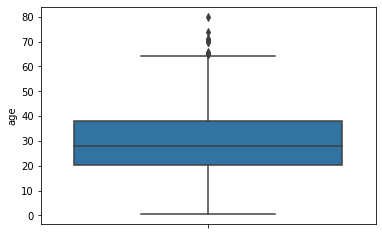

In [7]:
sns.boxplot(y='age',data=df)

From boxplot we can observe age has outliers so will fill the missing data with median

In [8]:
#fill the missing values with median
df['age']=df['age'].fillna(df['age'].median())

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### Treating Missing Values in Column Deck

In [10]:
print('deck',688/891)

deck 0.7721661054994389


deck column has more that 70 % missing values so we can drop that column.

In [11]:
df=df.drop(['deck'],axis=1)

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


##### Treating Missing Values in Column Embarked Age

In [13]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [14]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode())

In [15]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

##### Treating Missing Values in Embark_town

In [16]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

Since embarked & embark_town as same values i.e emabark_town is short form for embarked. we can drop this column

In [17]:
df=df.drop(['embark_town'],axis=1)

In [18]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [19]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,889,891,891,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,549,537
mean,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN


From the data we can observe:

1. alive is same as survived so drop the alive column
2. pclass is same as class so drop the alive column
3. alone is not required as we have column parch & sibsp. If he has parents & siblings then he/she is not alone & vice-versa.
4. adult_male is also not required as from who we can recognize if they are man/female/child.
5. who is also not required as from sex & age column we can interpret if they are man/female/child
6. Can drop fare as fare won't indicate who survived or not

In [20]:
# drop survived , class, alone, adult_male, who, fare

df=df.drop(['alive','class','alone','adult_male','who','fare'],axis=1)

In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
survived    891 non-null int64
pclass      891 non-null int64
sex         891 non-null object
age         891 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


#### Label Encoding

In [23]:
#Converting sex to numerical. 1-male 0-female
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [24]:
#Converting embarked to numerical. 1-male 0-female
df['embarked']=df['embarked'].astype('category')
df['embarked']=df['embarked'].cat.codes
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [25]:
df=pd.get_dummies(df,columns=['embarked'])

In [27]:
df.head(20)

,survived,pclass,sex,age,sibsp,parch,embarked_-1,embarked_0,embarked_1,embarked_2
0,0,3,1,22.0,1,0,0,0,0,1
1,1,1,0,38.0,1,0,0,1,0,0
2,1,3,0,26.0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,0,0,0,1
4,0,3,1,35.0,0,0,0,0,0,1
5,0,3,1,28.0,0,0,0,0,1,0
6,0,1,1,54.0,0,0,0,0,0,1
7,0,3,1,2.0,3,1,0,0,0,1
8,1,3,0,27.0,0,2,0,0,0,1
9,1,2,0,14.0,1,0,0,1,0,0


In [30]:
df=df.drop(['embarked_-1','embarked_0'],axis=1)

In [31]:
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked_1,embarked_2
0,0,3,1,22.0,1,0,0,1
1,1,1,0,38.0,1,0,0,0
2,1,3,0,26.0,0,0,0,1
3,1,1,0,35.0,1,0,0,1
4,0,3,1,35.0,0,0,0,1


#### Outlier

outlier is non-significant activity in logistic regression

#### Feature scaling

feature scaling is not required as except age column all are in binary form

#### Imbalance data

In [32]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

it is in balanced form

## EDA

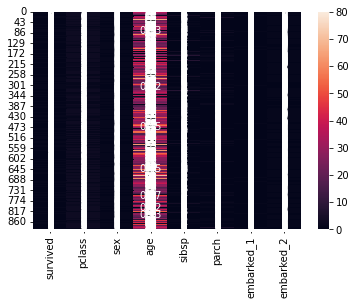

In [34]:
sns.heatmap(df,annot=True)

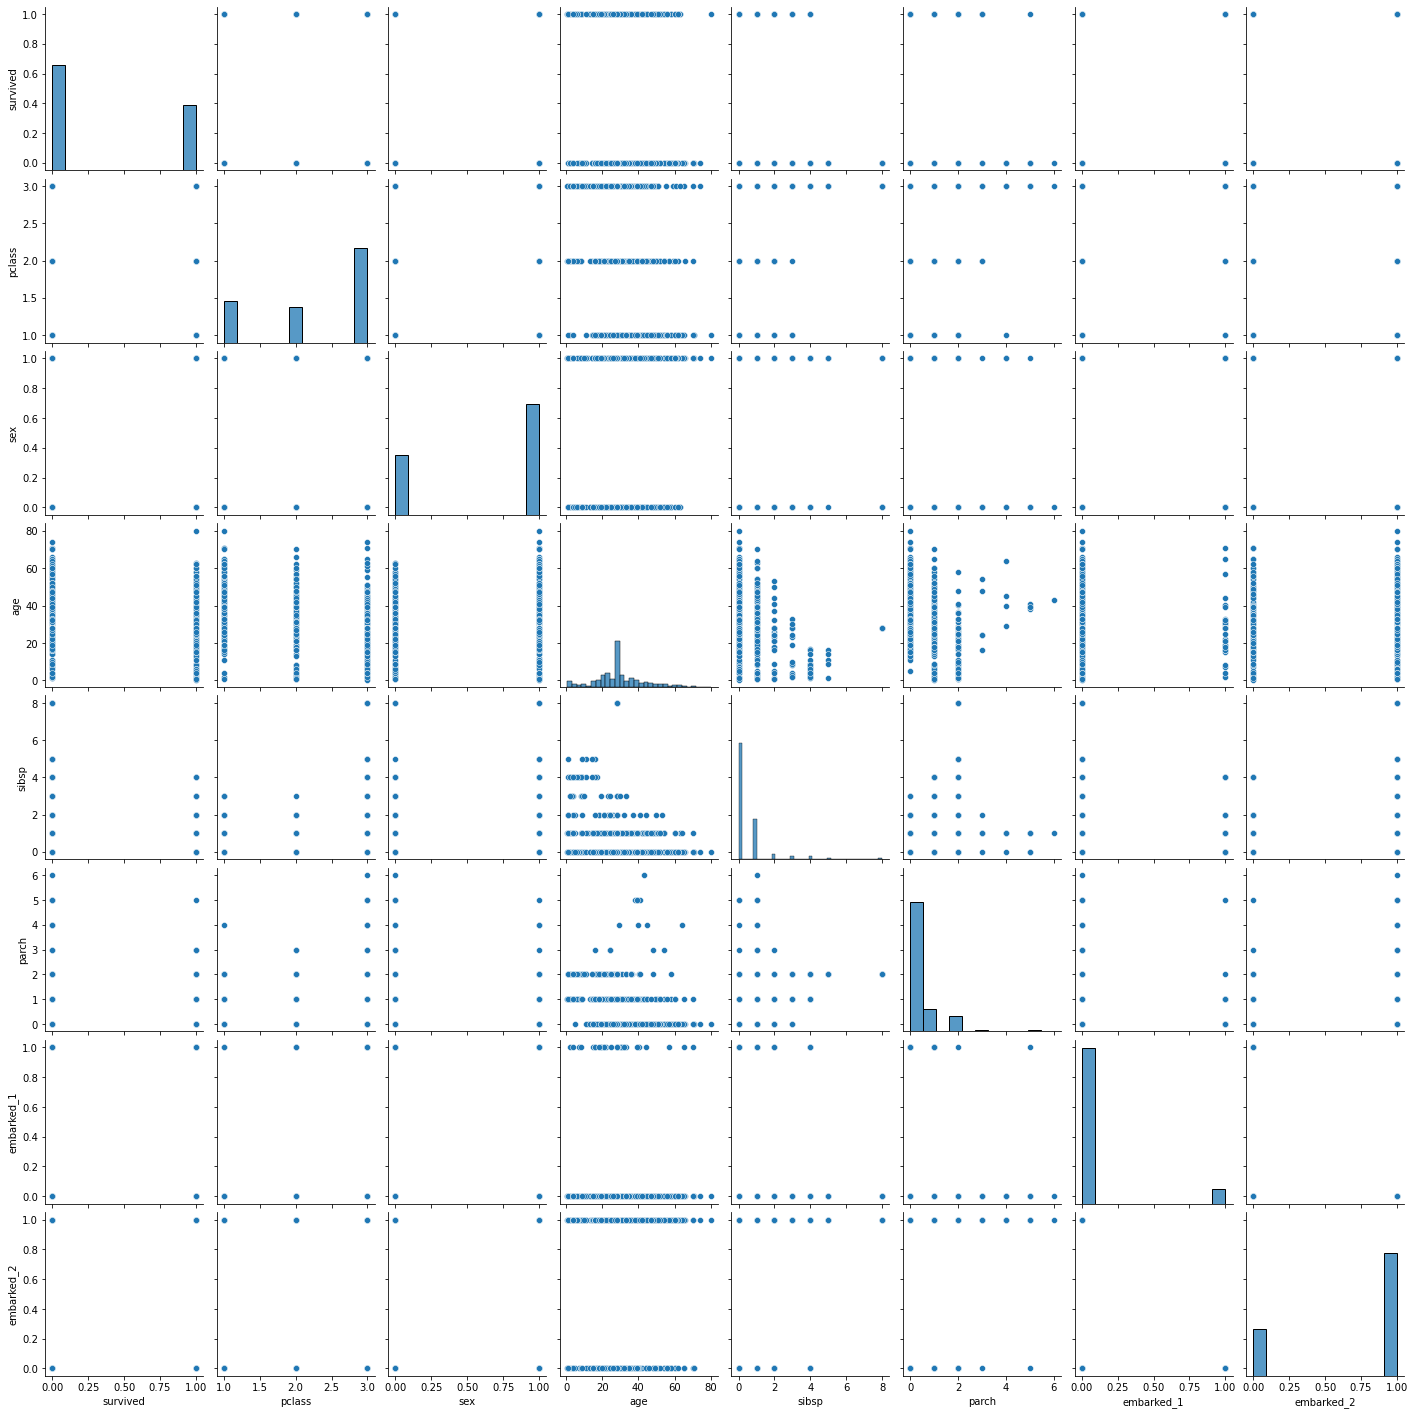

In [35]:
sns.pairplot(df)

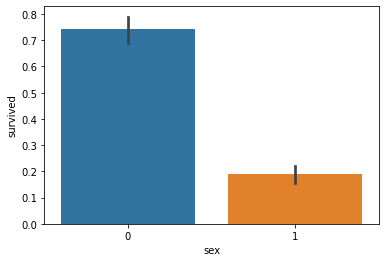

In [36]:
sns.barplot(x='sex',y='survived',data=df)

In [37]:
# Split the data into dependent & independent variable
x=df.iloc[:,1:].values
y=df['survived'].values

In [38]:
x

array([[ 3.,  1., 22., ...,  0.,  0.,  1.],
       [ 1.,  0., 38., ...,  0.,  0.,  0.],
       [ 3.,  0., 26., ...,  0.,  0.,  1.],
       ...,
       [ 3.,  0., 28., ...,  2.,  0.,  1.],
       [ 1.,  1., 26., ...,  0.,  0.,  0.],
       [ 3.,  1., 32., ...,  0.,  1.,  0.]])

# Splitting the Data

In [39]:
# Split the data into training & test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=12)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 7)
(223, 7)
(668,)
(223,)


# Creating Logistic Regression Model with training dataset

In [42]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred_test=lm.predict(x_test)

In [44]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0], dtype=int64)

In [45]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

# Evaluation Of Model

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [47]:
print(confusion_matrix(y_test,y_pred_test))

[[116  14]
 [ 27  66]]


In [48]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       130
           1       0.82      0.71      0.76        93

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223



In [49]:
print(accuracy_score(y_test,y_pred_test))

0.8161434977578476


In [50]:
y_pred_train=lm.predict(x_train)

In [51]:
print(accuracy_score(y_train,y_pred_train))

0.8008982035928144


In [53]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc_=roc_auc_score(y_test, y_pred_test)

In [56]:
logistic_roc_auc_

0.8009925558312654

In [52]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test,y_pred_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.        , 0.10769231, 1.        ])

array([0.        , 0.70967742, 1.        ])

array([2, 1, 0], dtype=int64)

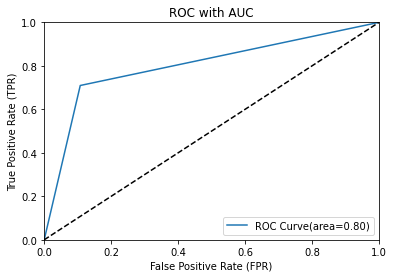

In [58]:
# Plotting ROC & AUC

plt.figure()
plt.plot(fpr,tpr,label="ROC Curve(area=%0.2f)"%logistic_roc_auc_)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC with AUC")
plt.legend(loc='lower right')
plt.show()

# K-fold method ( cross validation approach)

In [60]:
from sklearn.model_selection import cross_val_score
acc_training=cross_val_score(lm,x_train,y_train,cv=15)
acc_test=cross_val_score(lm,x_test,y_test,cv=15)
print(acc_training)
print(acc_test)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

[0.64444444 0.73333333 0.73333333 0.84444444 0.84444444 0.8
 0.75555556 0.73333333 0.93181818 0.72727273 0.84090909 0.86363636
 0.84090909 0.86363636 0.72727273]
[0.73333333 0.86666667 0.73333333 0.93333333 0.66666667 0.73333333
 0.8        0.86666667 0.8        0.86666667 0.73333333 0.86666667
 0.8        1.         0.85714286]


In [96]:
print("Training accuracy : ",acc_training[8])
print("Test accuracy : ",acc_test[13])

Training accuracy :  0.9318181818181818
Test accuracy :  1.0


# Decision Tree - Classification

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt_gini=DecisionTreeClassifier(criterion='gini')
dt_entropy=DecisionTreeClassifier(criterion='entropy')
dt_gini.fit(x_train,y_train)
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [98]:
y_pred_dt_gini_train=dt_gini.predict(x_train)
y_pred_dt_gini_test=dt_gini.predict(x_test)


y_pred_dt_entropy_train=dt_entropy.predict(x_train)
y_pred_dt_entropy_test=dt_entropy.predict(x_test)

In [99]:
print("Acuracy score for Gini Decision Tree Train: ",accuracy_score(y_train,y_pred_dt_gini_train))
print("Acuracy score for Gini Decision Tree Test: ",accuracy_score(y_test,y_pred_dt_gini_test))
print("Acuracy score for Entropy Decision Tree Train: ",accuracy_score(y_train,y_pred_dt_entropy_train))
print("Acuracy score for Entropy Decision Tree Test: ",accuracy_score(y_test,y_pred_dt_entropy_test))

Acuracy score for Gini Decision Tree Train:  0.938622754491018
Acuracy score for Gini Decision Tree Test:  0.7668161434977578
Acuracy score for Entropy Decision Tree Train:  0.938622754491018
Acuracy score for Entropy Decision Tree Test:  0.7623318385650224


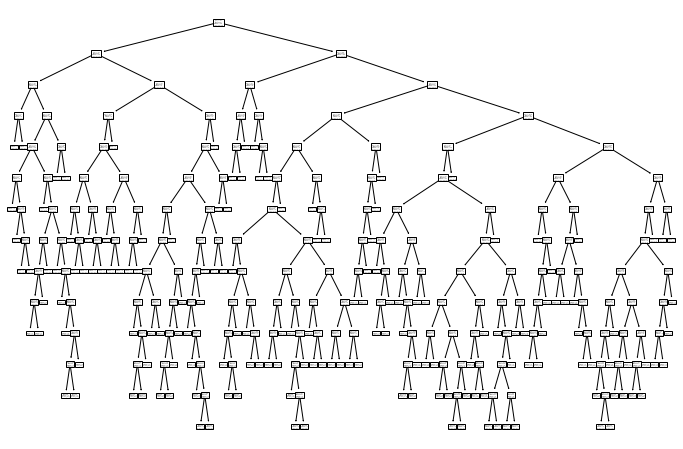

In [100]:
# visualization

from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dt_gini)
plt.show()

In [105]:
x=df.iloc[:,1:]
y=df['survived']

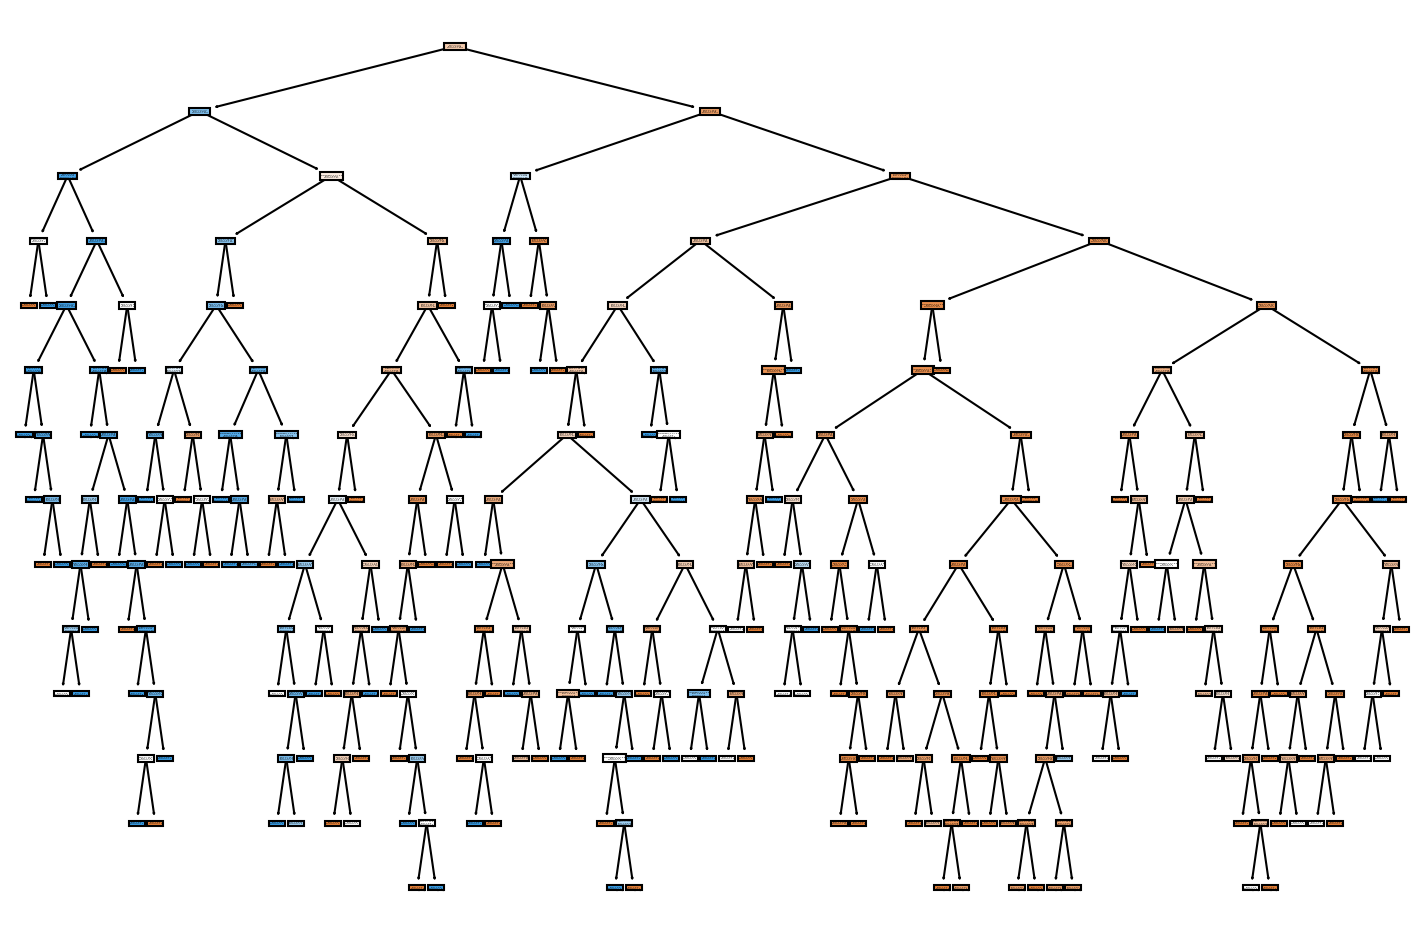

In [106]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt_gini,filled=True,feature_names=x.columns)
plt.show()